### Importing data in python
One of the main issues that we need to cover in python is how to bring data into our environment to do this we will use the pandas library and we will also use the matplotlib library so we can start to plot  our data in beautiful ways..


What to do with data in an excel file format?  simply import it with the command 

Almost the exact same process as opening and working with a CSV (comma seperated value file) you just substitue
```
df = pd.read_csv('filename.csv')
```

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

df_excel = pd.read_excel('VO2_excel.xlsx') #this line works

# this prints out the first 5 lines of our new dataframe
df_excel.head()

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/,VE/ .1,PetCO2,Power
0,,STPD,STPD,,STPD,BTPS,,,BTPS,,,,VO2,VCO2,,NaN
1,min,L/min,ml/kg/m,,L/min,L/min,,BPM,L,%,%,bpm,BT/ST,BT/ST,mmHg,Watts
2,----------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.517167,0.247651,4.552413,1.30069,0.18422,19.603882,0.743868,17.402514,1.126497,19.247952,1.36228,82,79.15921,106.415611,10.536668,50
4,1.052167,0.687631,12.640276,3.611507,0.524605,19.488014,0.762917,22.429905,0.868841,16.212049,3.827807,84,28.340801,37.147957,25.49148,50


View what we have by using dataframe.info()

In [ ]:
df_excel.info()

We can assign the column value of Time to the variable x like this (below)

Select the value when it appears instead of typing it yourself so you get the correct spacing!

In [ ]:
x1 = df_excel["TIME "] # note there is an extra space in the header TIME! if you write "TIME" it will throw an error

We probably want to remove the data in the 2nd row (3) as the series of dashes --------- indicates that this is where the data starts and we don't what to have NaN (not a number) data in our datafram we could clean this up later but why import the issue to begin with

To tell Pandas where the data frame should start and what to include we can use the **header**, and **skiprows** arguments in the example below I say that the header information is in the first (0) and thrid (2) lines, and that the forth line (3) should be skipped.  We should do this as currently column 0 and column 15 have different lengths

In [ ]:
# note we don't need to import anything becuse we did this in the previous cell
# we also will just overwrite the df_excel variable we previously created

df_excel = pd.read_excel('VO2_excel.xlsx', header=[0,2], skiprows=[3]) #this line works it will also put the units in the header data

df_excel.head() # the head command just shows us the first 5 lines..

#df_excel.tail() # this shows us the last 5 lines of the data frame

Attempting to add value to x though does not work as the header is too complex now to read so you would assign the column number instead we can see that the x variable (column name) is a tuple and that is why we cannot assign it to a name

In [ ]:
x1 = df_excel.columns[0]
print(type(x1))

print('This tuple has', len(x1), 'values')
print(x1)

We can peak at the data frame that we made from the excel data by using the info() command again and wee se that all the data columns are the same size now

In [ ]:
df_excel.info()


**Note** When the header names are tuples they can not be called by using the column header so lets return to a simple header format

You can remove these spaces & special characters but that is more than we have time for in this class...

In [167]:
df_excel = pd.read_excel('VO2_excel.xlsx', header=[0], skiprows=[1,2,3]) 
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIME      55 non-null     float64
 1   VO2       55 non-null     float64
 2   VO2/kg    55 non-null     float64
 3   METS      55 non-null     float64
 4   VCO2      55 non-null     float64
 5   VE        55 non-null     float64
 6   RER       55 non-null     float64
 7   RR        55 non-null     float64
 8   Vt        55 non-null     float64
 9   FEO2      55 non-null     float64
 10  FECO2     55 non-null     float64
 11  HR        55 non-null     float64
 12  VE/       55 non-null     float64
 13  VE/   .1  55 non-null     float64
 14  PetCO2    55 non-null     float64
 15  Power     55 non-null     int64  
dtypes: float64(15), int64(1)
memory usage: 7.0 KB


Now lets just plot the data to see what it looks like

<AxesSubplot:xlabel='TIME '>

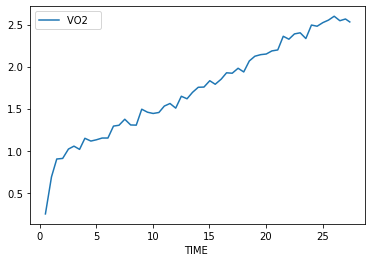

In [168]:
df_excel.plot(x=0, y=1) # we are calling the data column numbers here

You can add a second plot to this graph very easily by adding another plot...
I am defining the variables by assigning them to the column header here, be sure to use the **tab** feature to add the column name or you will likely get the spacing in the name incorrect and it will throw and error.

In [ ]:
#This also works
x = df_excel['TIME ']
y = df_excel['VO2   ']
y1 = df_excel['VCO2  ']
plt.plot(x, y, c= 'r', label = '$\dot VO_2$')
plt.plot(x, y1, c='b', label='VE')
plt.legend()

We can spruce this up a bit by putting a title on the graph and labelling our axes
>  ***_Note_*** I added the correct subscript and dot over the $ \dot V$ using LaTec script between \$  $ characters

In [ ]:
df_excel.plot(x =0, y =1, xlabel='Time (min)', ylabel=(r'$\dot VO_2 (L/min)$'), label=('$\dot VO_2$ L/min'), 
     title='Simple $\dot VO_2$ time plot', c='r')

### Lets go full hog and make the plot look super nice!
I am also going to use the max function to find VO2 max and print it on the chart

As a final touch I will save the output to the file named test.png

I have included the hyperlink to the matplotlib library below where you can find all the hidden features to this gem

 https://matplotlib.org/stable/index.html

In [ ]:
x = df_excel['TIME ']
y = df_excel['VO2   ']

# https://matplotlib.org/stable/index.html


ymax = max(y)
xmax = x[y.argmax()]
fig, ax = plt.subplots()
ax.annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), xy=(xmax, ymax), xytext=(xmax, ymax+.25),
            arrowprops=dict(facecolor='red'),
            )


ax.plot(x, y,  label=('$\dot VO_2$ L/min') )
# ax.plot(x, y1,  label=('$\dot VCO_2$ L/min') )
ax.spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax.set(xlabel=('time'))
ax.set(ylabel=('L/min'))
ax.legend()

fig.savefig("test.jpg", dpi=300, bbox_inches = "tight")
# Code below works without the fig, ax settings... line 10 but it is ugly...
#df.plot(x =0, y =1, xlabel='Time (min)', ylabel=(r'$\dot VO_2 (L/min)$'), label=('$\dot VO_2$ L/min'), 
#     title='Simple $\dot VO_2$ time plot')

### It should probably be pointed out here you have done all the hard work...
If you have multiple files with the same layout, changing the file you import will generate this graph easily...
You could even put this in a for loop and do all files in a folder in minutes...
just change it so the figure file is saved based on the filename currently used...

### You can now plot three graphs and share the same x axis
you just need to modify your code sligthly...

In [ ]:
x = df_excel['TIME ']
y = df_excel['VO2   ']
y1 = df_excel['VE     '] #added extra values
y2 = df_excel['VCO2  ']

# https://matplotlib.org/stable/index.html

# find vo2 max in y value
ymax = max(y)
# find position that max occurs in x column
xmax = x[y.argmax()]


# add arguments to subplot to plot 3 graphs in 1 box with a shared x axis
fig, ax = plt.subplots(3, 1, sharex=True) 
# remove horizontal spaces between axes
fig.subplots_adjust(hspace=0)

#adds an indicator for VO2 max in top plot
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), xy=(xmax, ymax), xytext=(xmax, ymax+ 1),
            arrowprops=dict(facecolor='red'),
            )


ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()


ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

ax[2].plot(x, y2, label=('$\dot VCO_2$'), c = 'g')
ax[2].spines[['top', 'right']].set_visible(False)
ax[2].set(ylabel=('L/min'))
ax[2].set(xlabel=('time (min)'))
ax[2].legend()

fig.savefig("test.jpg", dpi=300, bbox_inches = "tight")
# Code below works without the fig, ax settings... line 10 but it is ugly...
#df.plot(x =0, y =1, xlabel='Time (min)', ylabel=(r'$\dot VO_2 (L/min)$'), label=('$\dot VO_2$ L/min'), 
#     title='Simple $\dot VO_2$ time plot')